In [2]:
%matplotlib inline
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

train loss:2.2996486648237444
=== epoch:1, train acc:0.377, test acc:0.361 ===
train loss:2.2973346648799238
train loss:2.2923501308783516
train loss:2.2851784818992993
train loss:2.2756665481044727
train loss:2.263927689268299
train loss:2.251993270944831
train loss:2.2154363320284776
train loss:2.2035343310842594
train loss:2.1762572874930783
train loss:2.172716589855977
train loss:2.0911300563678346
train loss:2.0875229439314107
train loss:1.9906638553270433
train loss:1.9622421037360038
train loss:1.8618512175682096
train loss:1.777682427879227
train loss:1.7129878885629488
train loss:1.5591567671166766
train loss:1.6265494534979492
train loss:1.5112750719321029
train loss:1.3958867749872035
train loss:1.344851734614418
train loss:1.2069853666387957
train loss:1.1370799626226862
train loss:1.0773095692861947
train loss:0.9735247317611321
train loss:0.9086231679577808
train loss:0.9504011035099569
train loss:0.8166792255201518
train loss:0.7805031318352964
train loss:0.8439362844877

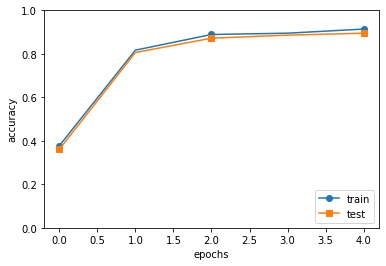

In [3]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 感想
畳み込み演算を使用しているため，すばやく処理ができているように感じた。また，エポック数が5でAccuracyが9割を超えているため、効率的に学習できているように感じた。simple_convnet.pyの実装を確認したところ，Convレイヤが一層目に入って画像の特徴を抽出していることが分かった。